In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import folium
from sklearn.preprocessing import OneHotEncoder
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
#defining my worksheet
worksheet = gc.open('epic2binwidth').sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame
df = pd.DataFrame(rows)
cols = list(df.iloc[0])
cols[0] = 'bin_size'

In [ ]:
df.columns = cols
df = df.iloc[1:]
df = df.set_index(['bin_size'])
df

,nR9_n_LADs,nR21_n_LADs,nR24_n_LADs,nR9_LAD_coverage,nR21_LAD_coverage,nR24_LAD_coverage,aR3_n_LADs,aR25_n_LADs,aR28_n_LADs,aR3_LAD_coverage,aR25_LAD_coverage,aR28_LAD_coverage
bin_size,,,,,,,,,,,,
2k,1071,2207,1173,4.50%,10%,4.50%,3204,1029,1626,12%,2.35%,6.34%
4k,400,2124,412,4%,16%,4.60%,1781,728,1641,21%,5.23%,10.60%
8k,225,1467,210,3%,24%,4%,1200,653,1448,26.57%,8.51%,17%
16k,113,890,135,2.50%,28%,3.70%,575,573,1038,32.50%,10.47%,25.68%
32k,84,499,74,2.70%,32%,4%,323,425,640,35%,12.55%,32.30%


In [ ]:
aged = ['aR3', 'aR25', 'aR28']
neonate = ['nR9', 'nR21', 'nR24']

neonate_lad_number = df[df.columns[:3]]
neonate_lad_number.columns = neonate
neonate_lad_coverage = df[df.columns[3:6]]
neonate_lad_coverage.columns = neonate
adult_lad_number = df[df.columns[6:9]]
adult_lad_number.columns = aged
adult_lad_coverage = df[df.columns[9:]]
adult_lad_coverage.columns = aged
adult_lad_number

,aR3,aR25,aR28
bin_size,,,
2k,3204,1029,1626
4k,1781,728,1641
8k,1200,653,1448
16k,575,573,1038
32k,323,425,640


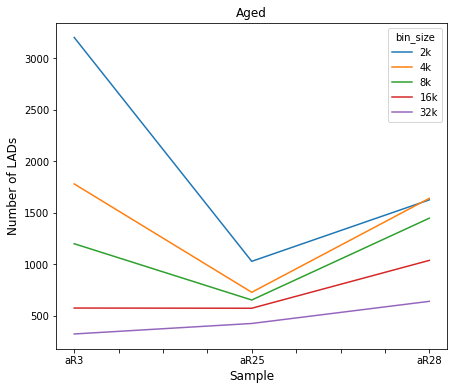

In [ ]:
ax = adult_lad_number.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

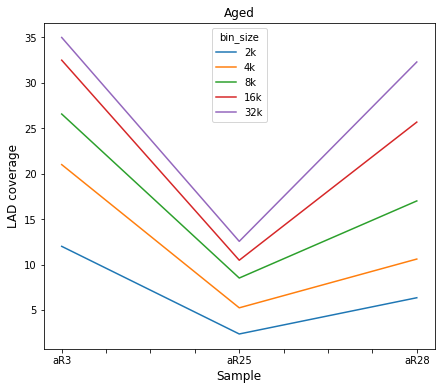

In [ ]:
adult_lad_coverage = adult_lad_coverage.apply(lambda x: x.str.strip('%'))
ax = adult_lad_coverage.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('LAD coverage', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

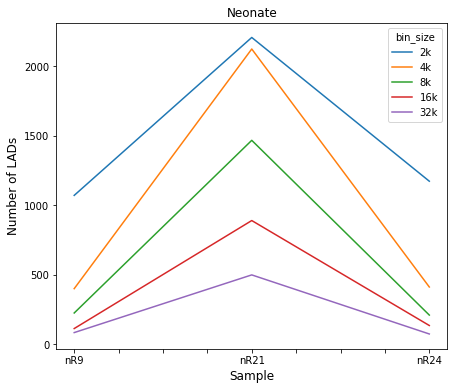

In [ ]:
ax = neonate_lad_number.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Neonate')
plt.show()

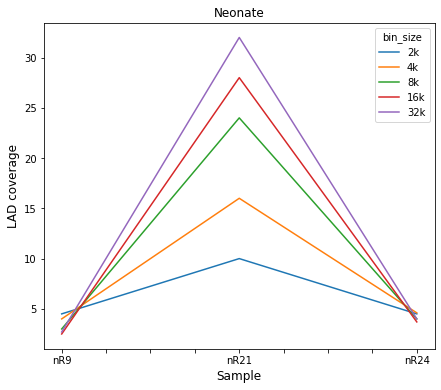

In [ ]:
neonate_lad_coverage = neonate_lad_coverage.apply(lambda x: x.str.strip('%'))
ax = neonate_lad_coverage.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('LAD coverage', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Neonate')
plt.show()

In [ ]:
df.columns

Index(['nR9_n_LADs', 'nR21_n_LADs', 'nR24_n_LADs', 'nR9_LAD_coverage',
       'nR21_LAD_coverage', 'nR24_LAD_coverage', 'aR3_n_LADs', 'aR25_n_LADs',
       'aR28_n_LADs', 'aR3_LAD_coverage', 'aR25_LAD_coverage',
       'aR28_LAD_coverage'],
      dtype='object')

In [ ]:
aged = ['aR3', 'nR21', 'aR28']
neonate = ['nR9', 'aR25', 'nR24']

neonate_switched_number = df[['nR9_n_LADs', 'aR25_n_LADs', 'nR24_n_LADs']]
neonate_switched_number.columns = neonate
neonate_switched_coverage = df[['nR9_LAD_coverage', 'aR25_LAD_coverage', 'nR24_LAD_coverage']]
neonate_switched_coverage.columns = neonate
adult_switched_number = df[['aR3_n_LADs', 'nR21_n_LADs', 'aR28_n_LADs']]
adult_switched_number.columns = aged
adult_switched_coverage = df[['aR3_LAD_coverage', 'nR21_LAD_coverage', 'aR28_LAD_coverage']]
adult_switched_coverage.columns = aged
adult_switched_coverage

,aR3,nR21,aR28
bin_size,,,
2k,12%,10%,6.34%
4k,21%,16%,10.60%
8k,26.57%,24%,17%
16k,32.50%,28%,25.68%
32k,35%,32%,32.30%


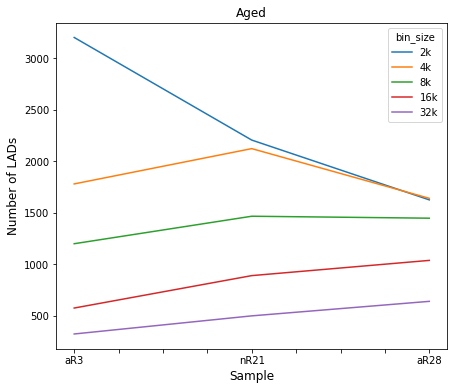

In [ ]:
ax = adult_switched_number.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

In [ ]:
dd = adult_switched_number.apply(pd.to_numeric)
dd

,aR3,nR21,aR28
bin_size,,,
2k,3204,2207,1626
4k,1781,2124,1641
8k,1200,1467,1448
16k,575,890,1038
32k,323,499,640


In [ ]:
dd = dd.div(dd.sum(axis=1), axis=0)
dd

,aR3,nR21,aR28
bin_size,,,
2k,0.455308,0.313628,0.231064
4k,0.321132,0.382979,0.295889
8k,0.291616,0.356501,0.351883
16k,0.229724,0.355573,0.414702
32k,0.220930,0.341313,0.437756


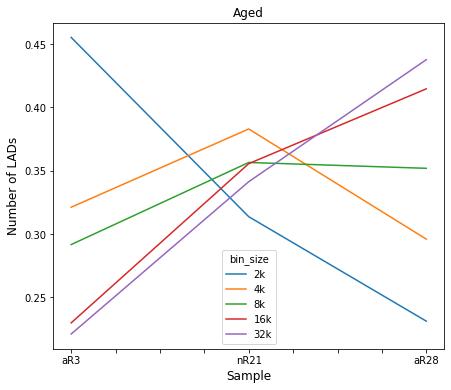

In [ ]:
ax = dd.T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

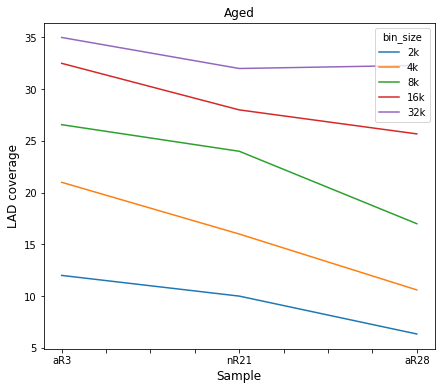

In [ ]:
adult_switched_coverage = adult_switched_coverage.apply(lambda x: x.str.strip('%'))
ax = adult_switched_coverage.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('LAD coverage', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

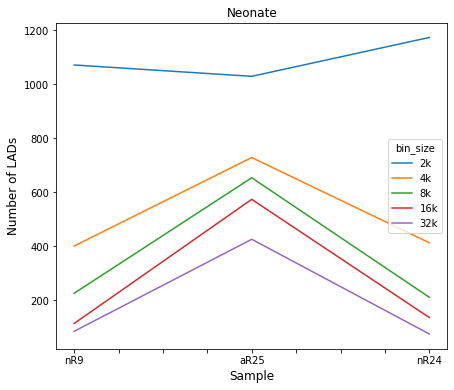

In [ ]:
ax = neonate_switched_number.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Neonate')
plt.show()

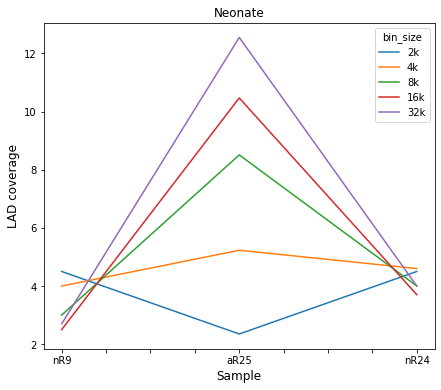

In [ ]:
neonate_switched_coverage = neonate_switched_coverage.apply(lambda x: x.str.strip('%'))
ax = neonate_switched_coverage.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('LAD coverage', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Neonate')
plt.show()

In [ ]:
#defining my worksheet
worksheet = gc.open('epic2gapsize').sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame
df = pd.DataFrame(rows)
cols = list(df.iloc[0])
cols[0] = 'gap_size'
df.columns = cols
df = df.iloc[1:]
df = df.set_index(['gap_size'])
df

,nR9_n_LADs,nR21_n_LADs,nR24_n_LADs,nR9_LAD_coverage,nR21_LAD_coverage,nR24_LAD_coverage,aR3_n_LADs,aR25_n_LADs,aR28_n_LADs,aR3_LAD_coverage,aR25_LAD_coverage,aR28_LAD_coverage
gap_size,,,,,,,,,,,,
2,927,2760,886,4.13%,10%,4.39%,3361,1106,1910,14%,3.60%,5.78%
3,583,2395,586,4%,14%,4.39%,2513,931,1833,18%,4.64%,8.26%
6,225,1467,210,3%,24%,4%,1200,653,1448,26.57%,8.51%,17%
12,93,431,94,3.78%,38%,5.24%,379,417,744,35.76%,19.09%,31.77%


In [ ]:
aged = ['aR3', 'aR25', 'aR28']
neonate = ['nR9', 'nR21', 'nR24']

neonate_lad_number = df[df.columns[:3]]
neonate_lad_number.columns = neonate
neonate_lad_coverage = df[df.columns[3:6]]
neonate_lad_coverage.columns = neonate
adult_lad_number = df[df.columns[6:9]]
adult_lad_number.columns = aged
adult_lad_coverage = df[df.columns[9:]]
adult_lad_coverage.columns = aged
adult_lad_number

,aR3,aR25,aR28
gap_size,,,
2,3361,1106,1910
3,2513,931,1833
6,1200,653,1448
12,379,417,744


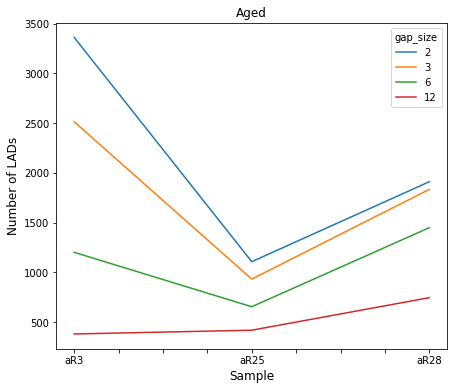

In [ ]:
ax = adult_lad_number.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

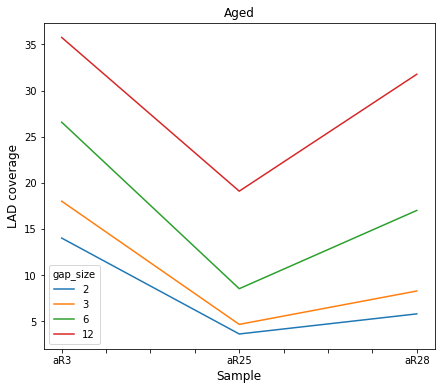

In [ ]:
adult_lad_coverage = adult_lad_coverage.apply(lambda x: x.str.strip('%'))
ax = adult_lad_coverage.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('LAD coverage', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

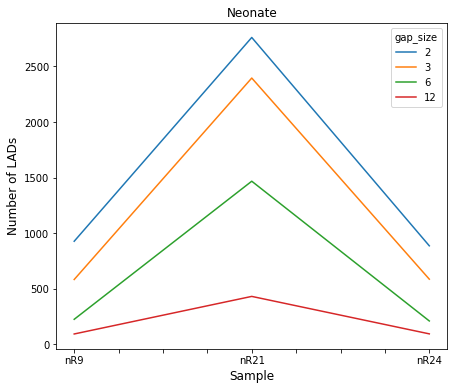

In [ ]:
ax = neonate_lad_number.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Neonate')
plt.show()

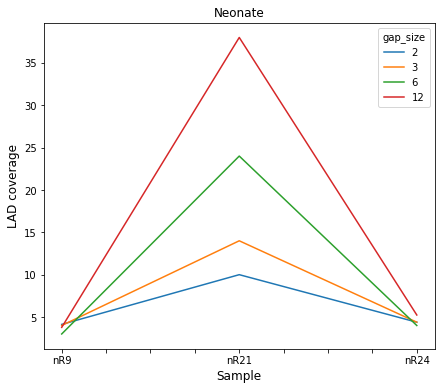

In [ ]:
neonate_lad_coverage = neonate_lad_coverage.apply(lambda x: x.str.strip('%'))
ax = neonate_lad_coverage.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('LAD coverage', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Neonate')
plt.show()

In [ ]:
aged = ['aR3', 'nR21', 'aR28']
neonate = ['nR9', 'aR25', 'nR24']

neonate_switched_number = df[['nR9_n_LADs', 'aR25_n_LADs', 'nR24_n_LADs']]
neonate_switched_number.columns = neonate
neonate_switched_coverage = df[['nR9_LAD_coverage', 'aR25_LAD_coverage', 'nR24_LAD_coverage']]
neonate_switched_coverage.columns = neonate
adult_switched_number = df[['aR3_n_LADs', 'nR21_n_LADs', 'aR28_n_LADs']]
adult_switched_number.columns = aged
adult_switched_coverage = df[['aR3_LAD_coverage', 'nR21_LAD_coverage', 'aR28_LAD_coverage']]
adult_switched_coverage.columns = aged
adult_switched_coverage

,aR3,nR21,aR28
gap_size,,,
2,14%,10%,5.78%
3,18%,14%,8.26%
6,26.57%,24%,17%
12,35.76%,38%,31.77%


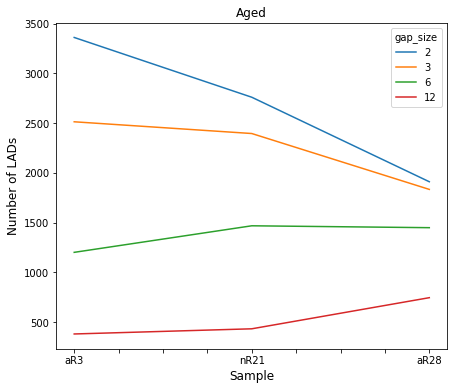

In [ ]:
ax = adult_switched_number.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

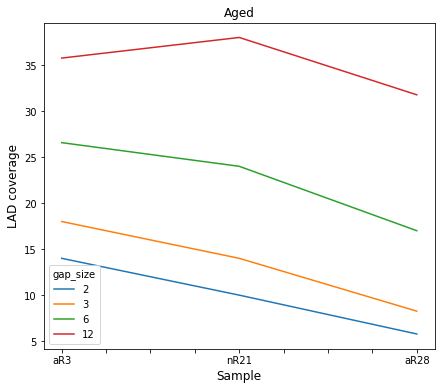

In [ ]:
adult_switched_coverage = adult_switched_coverage.apply(lambda x: x.str.strip('%'))
ax = adult_switched_coverage.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('LAD coverage', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Aged')
plt.show()

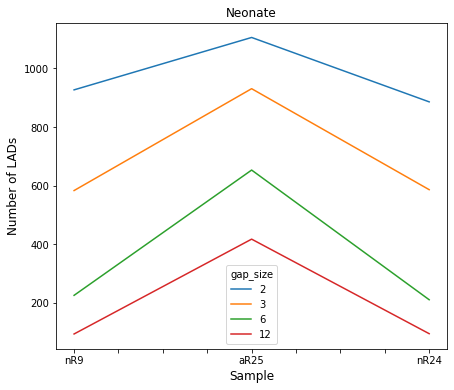

In [ ]:
ax = neonate_switched_number.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('Number of LADs', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Neonate')
plt.show()

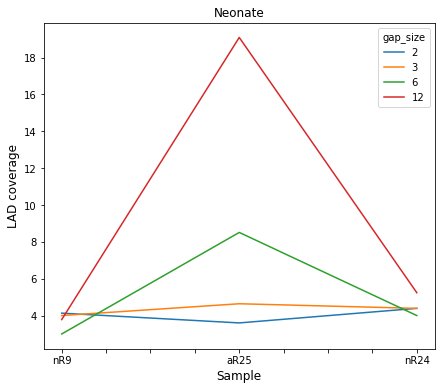

In [ ]:
neonate_switched_coverage = neonate_switched_coverage.apply(lambda x: x.str.strip('%'))
ax = neonate_switched_coverage.apply(pd.to_numeric).T.plot(figsize=(7, 6))
ax.set_ylabel('LAD coverage', fontsize=12)
ax.set_xlabel('Sample', fontsize=12)
ax.set_title('Neonate')
plt.show()